# Goal:Hotel Cancellation Predition

# Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Loading Dataset

In [265]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
# Inspecting datatypes of coloumns

In [266]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_month_year                 object
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                      

In [267]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,26,NaN,12,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,May 2017,NaN,August,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,21-10-2015
freq,79330,NaN,NaN,6313,NaN,13877,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,NaN,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,NaN,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,NaN,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,NaN,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,NaN,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,NaN,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [269]:
df.dtypes.value_counts()

int64      16
object     13
float64     4
dtype: int64

In [270]:
# We find 16 integer  coloumns,13 object datatype coloumns,4 float coloumns

In [271]:
# dataframe shape
df.shape

(119390, 33)

In [272]:
# Check linear Correlation
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [273]:
# Now we use 1 parametric and 1 non parametric model to check for non linear relationships among variables.We use 2 models as 2 different panels will verify the results 
# obtained so that chance of bad decisions based on these become lesser

In [274]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from itertools import combinations
from sklearn.model_selection import cross_val_score


In [275]:
df.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

# Duplicate Value Check

In [276]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = df.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')

Boolean series:
0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool




In [277]:
# Count of duplicate values
bool_series.sum()

31994

In [278]:
df[bool_series]

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
22,Resort Hotel,0,72,July 2015,2015,July,27,1,2,4,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,July 2015,2015,July,27,2,2,3,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,July 2015,2015,July,28,5,1,0,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,01-07-2015
200,Resort Hotel,0,0,July 2015,2015,July,28,7,0,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,08-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,August 2017,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,03-09-2017
119352,City Hotel,0,63,August 2017,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017
119353,City Hotel,0,63,August 2017,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017
119354,City Hotel,0,63,August 2017,2017,August,35,31,0,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,03-09-2017


In [ ]:
# We clearly see for example index 11952 and 11953 are repeated
# We need to remove duplicate records

In [283]:
print('DataFrame after keeping only the first instance of the duplicate rows:')
# The `~` sign is used for negation. It changes the boolean value True to False and False to True.
df=df[~bool_series]
df

DataFrame after keeping only the first instance of the duplicate rows:


,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August 2017,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,August 2017,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,August 2017,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,August 2017,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017


In [280]:
# Some inspection about the data distribution

In [284]:
df['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [285]:
# Here in is_cancelled coloumn 1 is cancelled 0 is not cancelled

In [23]:
# Create target coloumn from is cancelled coloumn

In [287]:
df['target']=np.where(df['is_canceled'].isin([1]),1,0) 

In [295]:
df['target'].value_counts()

0    63371
1    24025
Name: target, dtype: int64

In [296]:
df['target'].mean()

0.27489816467572886

In [297]:
# We find theres is class imbalance

In [298]:
# Lets visualise this target coloumn

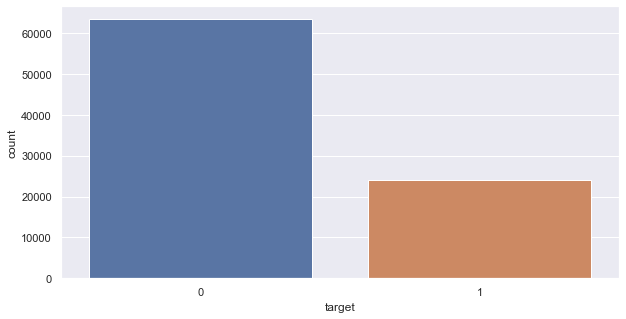

In [299]:
sns.countplot(x='target',data=df)
plt.show()

# Missing Value Analysis

In [300]:
# check for missing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_month_year                    0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193


In [301]:
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
previous_cancellations                0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
reservation_status_date               0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0


In [302]:
# We find company,agent,country and children has missing values

In [303]:
# Delving into nature of the data coloumns we find out that 
# For company if no data is given then it is private booking else it is booked by his company-So lets substitute the null values by 0
# If agent is missing then most likely made by the person himself without help from any travel agent
# For country if value missing then it is most liekly unknown
# If children data is missing then most likely the person deosn't have children


In [304]:
# Lets make a dictionary of such replacements to be done
nadict = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}

In [305]:
# fill null in dataframe
df = df.fillna(nadict)

# "meal" contains values "Undefined", which is same as SC category.So we replace undefined by sc
df["meal"].replace("Undefined", "SC", inplace=True)

In [306]:
df.isnull().any().sum()

0

#Some points to note
agent-The id of agent that did reservation is of no importanceto us
comany-The id of company that did reservation is of no importanceto us
reservation_status_date - We have other features (like: arrival_date_week_number, arrival_date_day_of_month etc) that gives us the same information


In [307]:
# Lets do some EDA

In [308]:
df['meal'].value_counts()

BB    67978
SC     9973
HB     9085
FB      360
Name: meal, dtype: int64

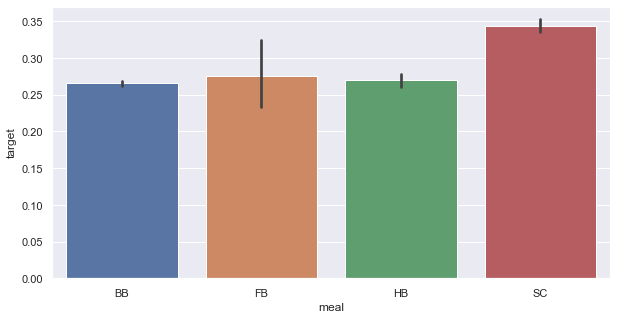

In [309]:
from numpy import mean
ax = sns.barplot(x="meal", y="target", data=df, estimator=mean)

In [310]:
# From dataset description we find that
# BB – Bed &Breakfast;
# HB – Half board(breakfastandone
# other meal – usually dinner);
# FB – Full board(breakfast,lunchand
# dinner)

In [311]:
# So FB has highest cancellation rates

In [312]:
# Lets find which coutries have highest cacellation rates

In [313]:
df.groupby('country')['target'].mean()

country
ABW    0.000000
AGO    0.564327
AIA    0.000000
ALB    0.181818
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.371795
ZMB    0.500000
ZWE    0.500000
Name: target, Length: 178, dtype: float64

In [314]:
# Highest cancellation countries
df.groupby('country')['target'].mean().sort_values(ascending=False).head(15)

country
MYT    1.000000
VGB    1.000000
JEY    1.000000
KHM    1.000000
BEN    1.000000
GLP    1.000000
UMI    1.000000
HND    1.000000
IMN    1.000000
NIC    1.000000
GGY    1.000000
FJI    1.000000
HKG    0.913043
MAC    0.900000
ARE    0.854167
Name: target, dtype: float64

In [315]:
sns.set(rc={'figure.figsize':(10,5)})

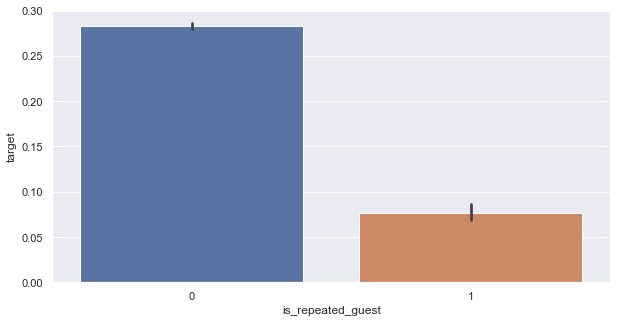

In [316]:
# Repeated Guest
ax = sns.barplot(x="is_repeated_guest", y="target", data=df, estimator=mean)

In [317]:
# We observe that repeated guest have much lower cancellation rates

In [318]:
# Market Segment Bookings

In [319]:
df['market_segment'].value_counts()

Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

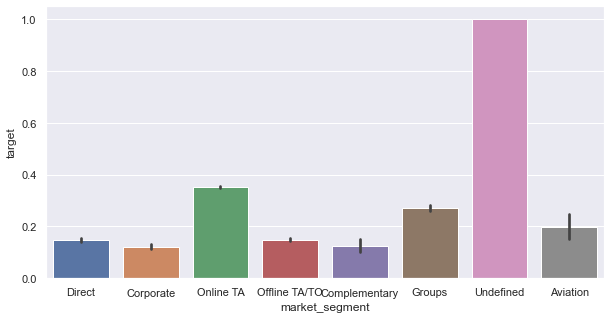

In [320]:
ax = sns.barplot(x="market_segment", y="target", data=df, estimator=mean)

In [321]:
df.groupby('market_segment')['target'].mean()

market_segment
Aviation         0.198238
Complementary    0.125356
Corporate        0.121083
Direct           0.147154
Groups           0.270134
Offline TA/TO    0.148535
Online TA        0.353462
Undefined        1.000000
Name: target, dtype: float64

In [322]:
# Ignoring undefined category snce it has only 2 datapoints we find that groups market segment has highest cancellation rates

In [323]:
# Inspection of month of arrival

In [324]:
df['arrival_date_month'].value_counts()

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

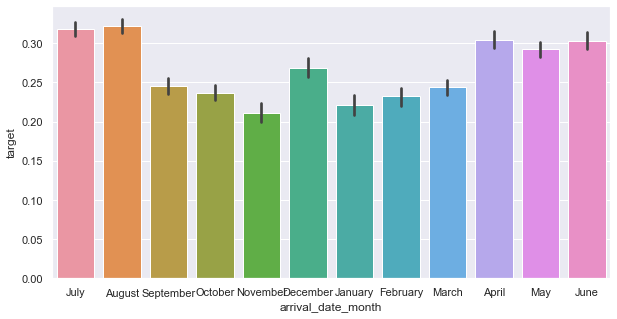

In [325]:
ax = sns.barplot(x="arrival_date_month", y="target", data=df, estimator=mean)

In [326]:
df.groupby('arrival_date_month')['target'].mean()

arrival_date_month
April        0.304628
August       0.321844
December     0.268564
February     0.232043
January      0.221180
July         0.317987
June         0.303155
March        0.243578
May          0.292280
November     0.211011
October      0.236804
September    0.245441
Name: target, dtype: float64

In [327]:
# Stays in weekend nights

In [328]:
df['stays_in_weekend_nights'].value_counts()

0     35151
2     26414
1     22657
4      1734
3      1150
6       113
5        70
8        60
7        15
9        10
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

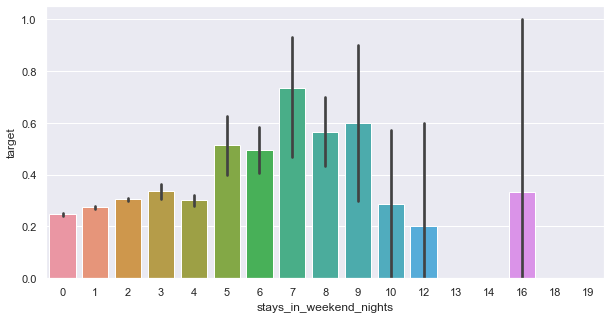

In [329]:
ax = sns.barplot(x="stays_in_weekend_nights", y="target", data=df, estimator=mean)

In [330]:
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0     0.247020
1     0.274176
2     0.305709
3     0.335652
4     0.301038
5     0.514286
6     0.495575
7     0.733333
8     0.566667
9     0.600000
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: target, dtype: float64

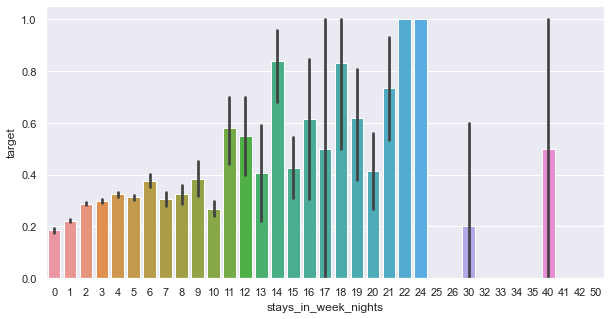

In [331]:
ax = sns.barplot(x="stays_in_week_nights", y="target", data=df, estimator=mean)

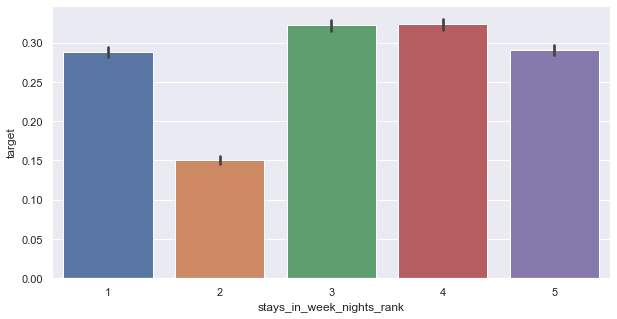

In [332]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="stays_in_week_nights_rank",y="target",data=df,estimator=mean)

In [333]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1    0
2    1
3    2
4    3
5    4
Name: stays_in_week_nights, dtype: int64

In [334]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,3))
df.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
3    0.274898
Name: target, dtype: float64

In [335]:
# Previous cancellations

In [336]:
df['previous_cancellations'].value_counts()

0     85711
1      1407
2       112
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

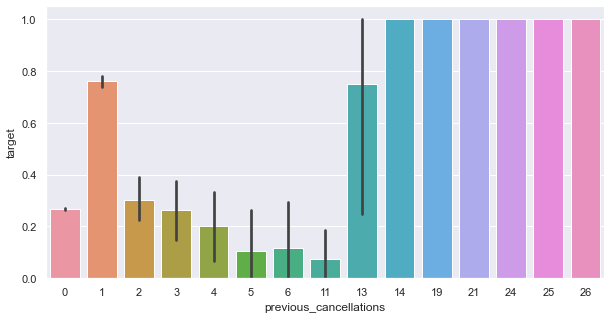

In [337]:
ax = sns.barplot(x="previous_cancellations", y="target", data=df, estimator=mean)

In [338]:
df.groupby('previous_cancellations')['target'].mean()

previous_cancellations
0     0.266955
1     0.761194
2     0.303571
3     0.262295
4     0.200000
5     0.105263
6     0.117647
11    0.074074
13    0.750000
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: target, dtype: float64

In [339]:
# MAking previous Cancellation Indicator variable

In [340]:
df['prev_cancel_ind']=np.where(df['previous_cancellations'].isin([0]),0,1)
df.groupby('prev_cancel_ind')['target'].count()

prev_cancel_ind
0    85711
1     1685
Name: target, dtype: int64

In [341]:
df['prev_cancel_ind'].value_counts()

0    85711
1     1685
Name: prev_cancel_ind, dtype: int64

In [342]:
# Booking Changes Inspecvtion

In [343]:
df.groupby('booking_changes')['target'].mean()

booking_changes
0     0.301676
1     0.138598
2     0.200684
3     0.149714
4     0.176966
5     0.172414
6     0.288136
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: target, dtype: float64

In [344]:
# Distribution Channel Inspection

In [345]:
df["distribution_channel"].value_counts()

TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

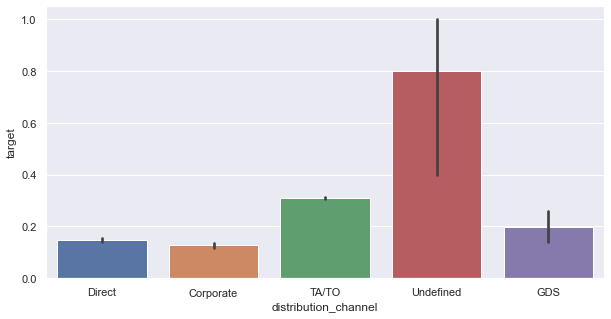

In [346]:
ax = sns.barplot(x="distribution_channel", y="target", data=df, estimator=mean)

In [347]:
# Reserved Room Type

In [348]:
df["reserved_room_type"].value_counts()

A    56552
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

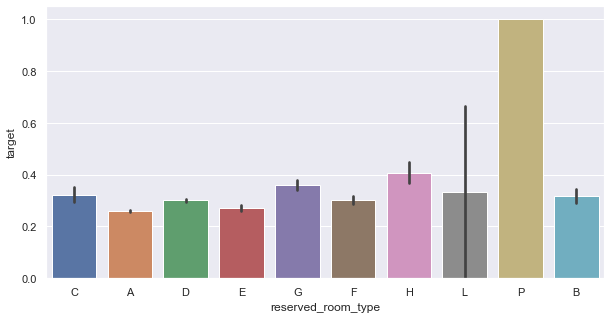

In [349]:
ax = sns.barplot(x="reserved_room_type", y="target", data=df, estimator=mean)

In [350]:
# Deposit Type Inspection

In [351]:
df.groupby('deposit_type')['target'].count()

deposit_type
No Deposit    86251
Non Refund     1038
Refundable      107
Name: target, dtype: int64

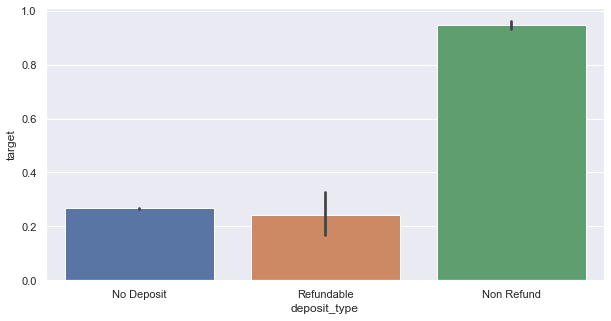

In [352]:
ax = sns.barplot(x="deposit_type", y="target", data=df, estimator=mean)

In [353]:
# Interesting Trend that nonrefundable had such high cancellation rates whereas nodposit and refundable had lower rates

In [354]:
df.groupby('deposit_type')['target'].mean()

deposit_type
No Deposit    0.266849
Non Refund    0.947013
Refundable    0.242991
Name: target, dtype: float64

In [355]:
# Customer Type Inspection

In [356]:
df.groupby('customer_type')['target'].count()

customer_type
Contract            3139
Group                544
Transient          71986
Transient-Party    11727
Name: target, dtype: int64

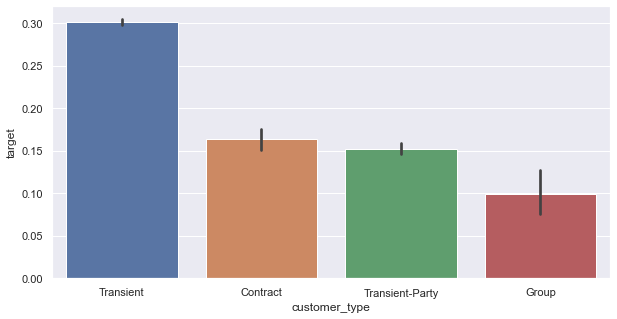

In [357]:
ax = sns.barplot(x="customer_type", y="target", data=df, estimator=mean)

In [358]:
# total_of_special_requests 

In [359]:
df.groupby('total_of_special_requests')['target'].count()

total_of_special_requests
0    43894
1    29017
2    11812
3     2317
4      320
5       36
Name: target, dtype: int64

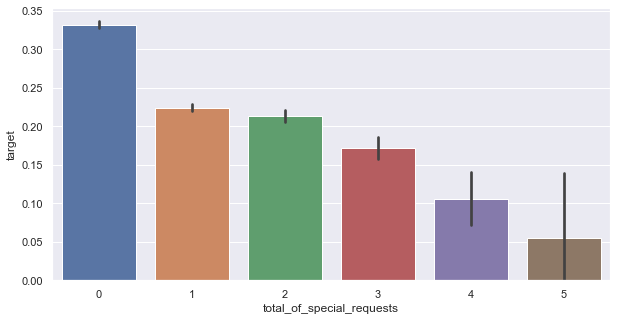

In [360]:
ax = sns.barplot(x="total_of_special_requests", y="target", data=df, estimator=mean)

In [361]:
# Create day_wait_rank

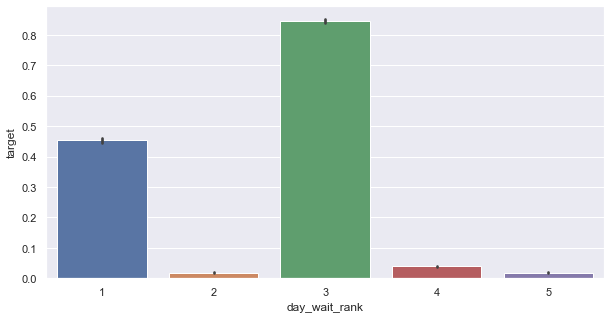

In [362]:
df['day_wait_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
a=sns.barplot(x="day_wait_rank",y="target",data=df,estimator=mean)

In [363]:
# Create indicator variable for day_wait_rank
# df['day_wait_ind']=np.where(df['day_wait_rank'].isin(['3']),1,0)
# df.groupby('day_wait_ind')['target'].count()

In [364]:
# Create indicator variable for day_wait_rank
df['day_wait_ind']=np.where(df['day_wait_rank'].isin([3]),1,0)
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    69917
1    17479
Name: target, dtype: int64

In [365]:
# Average Daily Rate

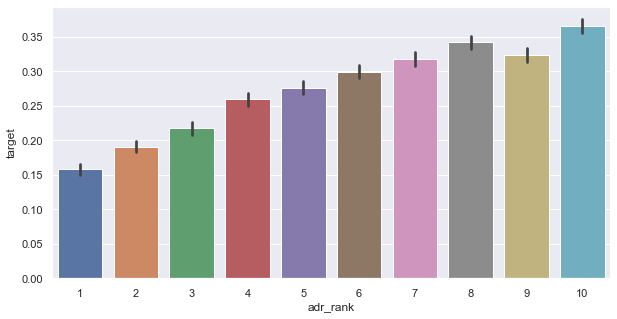

In [366]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="adr_rank",y="target",data=df,estimator=mean)

In [367]:
# Previous Cancellation rank

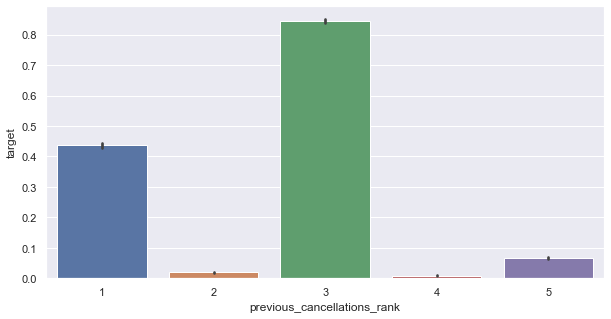

In [368]:
df['previous_cancellations_rank']=pd.qcut(df['previous_cancellations'].rank(method='first').values,5,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="previous_cancellations_rank",y="target",data=df,estimator=mean)

In [369]:
# Lead Time Rank

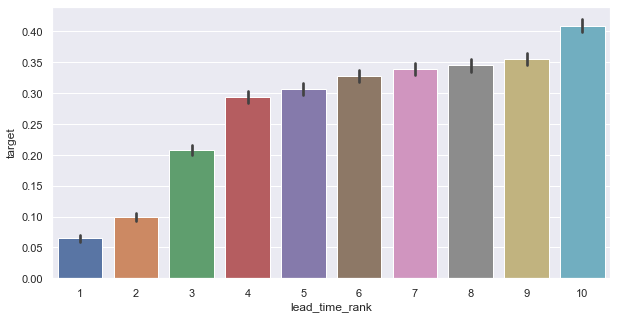

In [370]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('age_rank')['age'].max()
from numpy import mean
a=sns.barplot(x="lead_time_rank",y="target",data=df,estimator=mean)

In [371]:
df.groupby('lead_time_rank')['lead_time'].min()

lead_time_rank
1       0
2       1
3       7
4      17
5      31
6      49
7      73
8     105
9     148
10    204
Name: lead_time, dtype: int64

In [372]:
dep=['target']
col_num= ['lead_time','adr']   
         
col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment',
          'prev_cancel_ind','stay_in_week_night_grp']

In [373]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [374]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [375]:
X_var=X_all
Y_var=df['target']

In [376]:
X_all.shape

(87396, 29)

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

In [378]:
# Logistic regression
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [379]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [380]:
# Random Forest
rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 15)
rf_1000.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=1000,
                       random_state=2)

In [381]:
# Gradient Boosting Machine
gbm=GradientBoostingClassifier(random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [382]:
# Logistic Regression model Performance Evaluation

In [383]:
# Logisticv Regression model Evaluation metrics
y_predlogreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predlogreg))
print("Precision",metrics.precision_score(y_test,y_predlogreg))
print("Recall",metrics.recall_score(y_test,y_predlogreg))
print("f1_score",metrics.f1_score(y_test,y_predlogreg))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predlogreg))

Accuracy: 0.8755101262443267
Precision 0.8535984515220834
Recall 0.6660716737608129
f1_score 0.7482646922720964
cohen_kappa_score 0.6672376457214428


In [384]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predlogreg)
print(confusion_matrix)

[[18104   832]
 [ 2432  4851]]


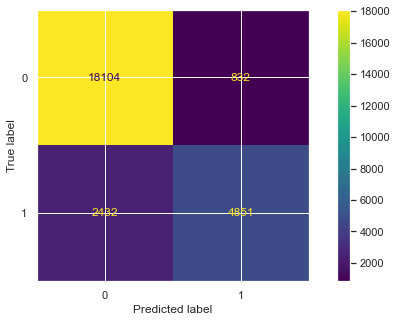

In [385]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

Accuracy: 0.8755101262443267
Precision 0.8535984515220834
Recall 0.6660716737608129
f1_score 0.7482646922720964
cohen_kappa_score 0.6672376457214428
[[18104   832]
 [ 2432  4851]]


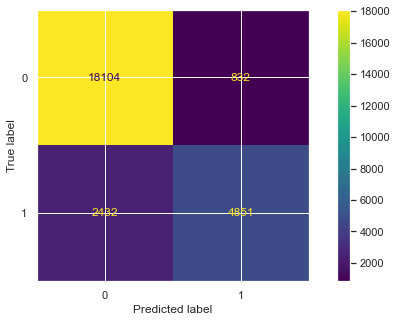

In [386]:
# Logisticv Regression model Evaluation metrics
y_predlogreg = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predlogreg))
print("Precision",metrics.precision_score(y_test,y_predlogreg))
print("Recall",metrics.recall_score(y_test,y_predlogreg))
print("f1_score",metrics.f1_score(y_test,y_predlogreg))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predlogreg))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predlogreg)
print(confusion_matrix)

metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [387]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predlogreg))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     18936
           1       0.85      0.67      0.75      7283

    accuracy                           0.88     26219
   macro avg       0.87      0.81      0.83     26219
weighted avg       0.87      0.88      0.87     26219



In [388]:
# # Decision Tree  Performance Evaluation

In [389]:
# Decision Tree model Evaluation metrics
y_pred_tree=dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_tree))

Accuracy: 0.8839391281132003
Precision 0.8958177744585512
Recall 0.6587944528353701
f1_score 0.759237281430493
cohen_kappa_score 0.6851026701661304


In [390]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix)

[[18378   558]
 [ 2485  4798]]


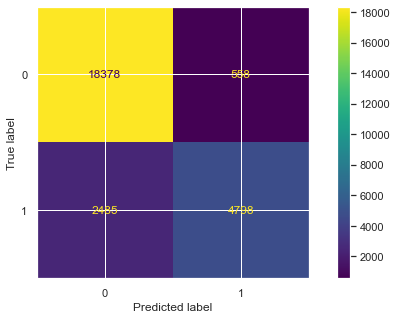

In [391]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [392]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     18936
           1       0.90      0.66      0.76      7283

    accuracy                           0.88     26219
   macro avg       0.89      0.81      0.84     26219
weighted avg       0.89      0.88      0.88     26219



In [393]:
# Random Forest Performance Evaluation

In [394]:
# Random Forest model Evaluation metrics
y_pred_rf=rf_1000.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_rf))

Accuracy: 0.8933597772607651
Precision 0.906652166032264
Recall 0.6868048880955651
f1_score 0.7815624999999999
cohen_kappa_score 0.7127895957860134


In [395]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[18421   515]
 [ 2281  5002]]


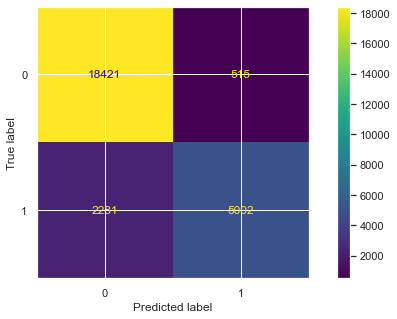

In [396]:
metrics.plot_confusion_matrix(rf_1000,X_test,y_test)

In [397]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18936
           1       0.91      0.69      0.78      7283

    accuracy                           0.89     26219
   macro avg       0.90      0.83      0.86     26219
weighted avg       0.89      0.89      0.89     26219



In [398]:
# Gradient Boosting Machine Performance Evaluation

In [399]:
# Gradient Boosting Machine model Evaluation metrics
y_pred_gbm=gbm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_pred_gbm))

Accuracy: 0.8940081620199092
Precision 0.8960604994723883
Recall 0.6995743512288892
f1_score 0.7857197933533813
cohen_kappa_score 0.7167215393795782


In [400]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_gbm)
print(confusion_matrix)

[[18345   591]
 [ 2188  5095]]


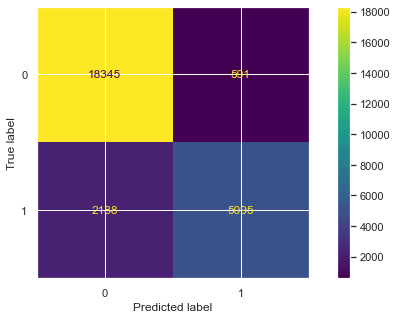

In [401]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [402]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18936
           1       0.90      0.70      0.79      7283

    accuracy                           0.89     26219
   macro avg       0.89      0.83      0.86     26219
weighted avg       0.89      0.89      0.89     26219



In [403]:
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlogreg),metrics.precision_score(y_test, y_predlogreg),metrics.recall_score(y_test, y_predlogreg),metrics.f1_score(y_test,y_predlogreg),metrics.cohen_kappa_score(y_test,y_predlogreg)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_tree),metrics.precision_score(y_test, y_pred_tree),metrics.recall_score(y_test, y_pred_tree),metrics.f1_score(y_test,y_pred_tree),metrics.cohen_kappa_score(y_test,y_pred_tree)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test,y_pred_rf),metrics.precision_score(y_test, y_pred_rf),metrics.recall_score(y_test,y_pred_rf),metrics.f1_score(y_test,y_pred_rf),metrics.cohen_kappa_score(y_test,y_pred_rf)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_gbm),metrics.precision_score(y_test, y_pred_gbm),metrics.recall_score(y_test, y_pred_gbm),metrics.f1_score(y_test,y_pred_gbm),metrics.cohen_kappa_score(y_test,y_pred_gbm)))

Logistic Regression     Accuracy is:0.88,Precision is:0.85,Recall is:0.67,F1 Score is :0.75 and Cohen_kappa_score is :0.67
Decision Tree           Accuracy is:0.88,Precision is:0.90,Recall is:0.66,F1 Score is :0.76 and Cohen_kappa_score is :0.69
Random Forest           Accuracy is:0.89,Precision is:0.91,Recall is:0.69,F1 Score is :0.78 and Cohen_kappa_score is :0.71
GradientBoostingMachine Accuracy is:0.89,Precision is:0.90,Recall is:0.70,F1 Score is :0.79 and Cohen_kappa_score is :0.72


# Prediction From The Model

In [404]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].mean()

P_Rank
0          NaN
1     0.021994
2     0.043298
3     0.059510
4     0.079215
5     0.103855
6     0.135928
7     0.190875
8     0.331159
9     0.734960
10    0.919666
Name: y_pred_P, dtype: float64

In [405]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['y_pred_P_dtree'].mean()

P_Rank_dtree
0          NaN
1     0.025426
2     0.042460
3     0.081033
4     0.104867
5     0.104867
6     0.104867
7     0.160229
8     0.298991
9     0.714138
10    0.974105
Name: y_pred_P_dtree, dtype: float64

In [406]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['y_pred_P_rf'].mean()

P_Rank_rf
0          NaN
1     0.026581
2     0.041337
3     0.055701
4     0.075293
5     0.097607
6     0.128235
7     0.195215
8     0.315451
9     0.713987
10    0.949305
Name: y_pred_P_rf, dtype: float64

In [407]:
y_pred_prob_gbm = gbm.predict_proba(X_var)[:, 1]
df['y_pred_gbm']=pd.DataFrame(y_pred_prob_gbm)
df['P_Rank_gbm']=pd.qcut(df['y_pred_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_gbm')['y_pred_gbm'].mean()

P_Rank_gbm
0          NaN
1     0.025280
2     0.038329
3     0.050813
4     0.064095
5     0.082689
6     0.119924
7     0.185575
8     0.336461
9     0.739473
10    0.969105
Name: y_pred_gbm, dtype: float64

In [408]:
# Show base model

In [409]:
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

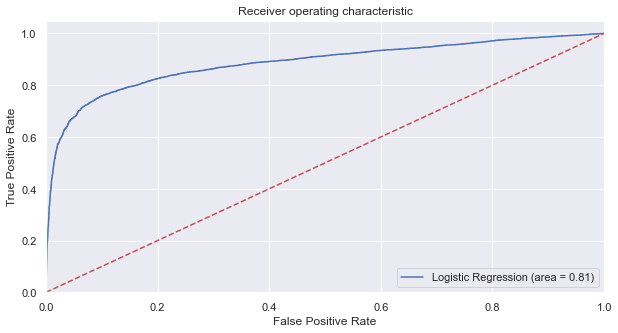

In [410]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))
GBM_roc_auc=roc_auc_score(y_test, gbm.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
# plt.plot(fpr, tpr, label='Random Foreest(area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

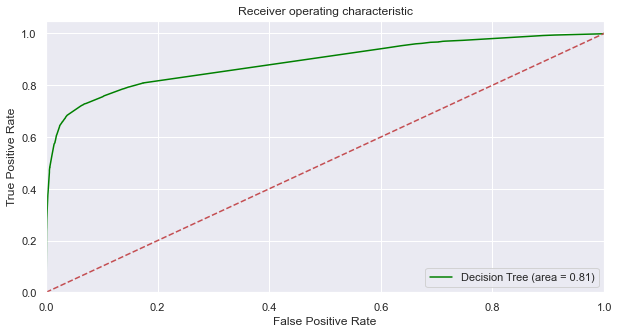

In [411]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

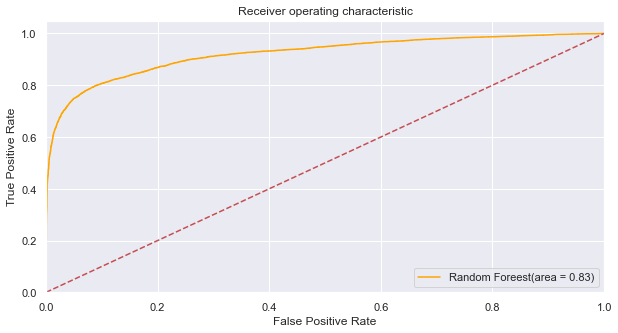

In [412]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
plt.plot(fpr, tpr, label='Random Foreest(area = %0.2f)' % RF_roc_auc,color="orange")
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

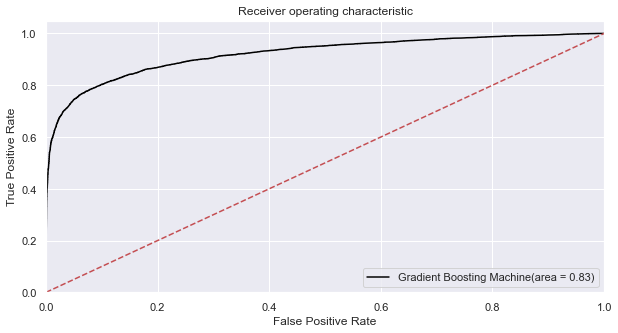

In [413]:
plt.figure()

# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBM_ROC')
plt.show()

In [414]:
# model.get_params().keys()

# Checking for Data Imbalance

In [415]:
y_train.value_counts()

0    44435
1    16742
Name: target, dtype: int64

In [416]:
y_train.value_counts()/sum(y_train.value_counts())

0    0.726335
1    0.273665
Name: target, dtype: float64

In [417]:
y_test.value_counts()

0    18936
1     7283
Name: target, dtype: int64

In [418]:
y_test.value_counts()/sum(y_test.value_counts())

0    0.722224
1    0.277776
Name: target, dtype: float64

In [419]:
# We have about lower representation of cancelled class(about 37 percent) compared to not cancelled clas(about 63 percent)
# We find mild data imbalance(20-40%) in train and test data

In [420]:
# We try to handle this mild class imbalance through using class_weight

In [468]:
# Logistic Regression Model Parameters Gridsearchcv
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression(max_iter=3000)
penalty = ['none', 'l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight=['balanced']
# define grid search
grid = dict(penalty=penalty,C=c_values,class_weight=class_weight) # 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-3, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print(grid_result.best_params_)
print(grid_result.best_score_)

Best: 0.741569 using {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.741364 (0.007919) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'none'}
0.741569 (0.007706) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
0.741364 (0.007919) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'none'}
0.741433 (0.007621) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'}
0.000000 (0.000000) with: {'C': 10, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
0.741364 (0.007919) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'none'}
0.741413 (0.007860) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
0.000000 (0.000000) with: {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1'}
0.0

In [464]:
storelp=grid_result.best_params_  #storing the best grid seach params for fast runtimes {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
storels=grid_result.best_score_ # 0.7459092351860768

In [465]:
storelp

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [424]:
# Lets do grid searchCv for decision tree to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
dtcv = DecisionTreeClassifier()
forest_params = [{'max_depth':[10,20,30,50], 'max_features': [10,15,20,25],'min_samples_leaf':[50,100],'class_weight':['balanced']}] # class_weight:'balanced'
clfgsdt = GridSearchCV(dtcv, forest_params, cv = 10, scoring='f1',n_jobs=-7)
clfgsdt.fit(X_train, y_train)
print(clfgsdt.best_params_)
print(clfgsdt.best_score_)

{'class_weight': 'balanced', 'max_depth': 20, 'max_features': 25, 'min_samples_leaf': 50}
0.7566909911319488


In [425]:
storedp=clfgsdt.best_params_ # {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 25, 'min_samples_leaf': 50}
storeds=clfgsdt.best_score_  # 0.7566909911319488

In [426]:
# Lets do grid searchCv to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
rfcgs = RandomForestClassifier(n_jobs=-3)
forest_params = [{'max_depth': [11,15,19,23], 'max_features': [10,15,20,25],'n_estimators':[50,75,100],'min_samples_leaf':[50,100],'class_weight':['balanced']}] # class_weight:'balanced'
clfgs = GridSearchCV(rfcgs, forest_params, cv = 10, scoring='f1')
clfgs.fit(X_train, y_train)
print(clfgs.best_params_)
print(clfgs.best_score_)

{'class_weight': 'balanced', 'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
0.7682407328809886


In [427]:
storerp=clfgs.best_params_ # {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
storers=clfgs.best_score_ # 0.7682407328809886


In [428]:
rfcgs.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [429]:
# Lets do grid searchCv to  push up performance

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbmcv = GradientBoostingClassifier()
gbm_params = [{'max_depth': [11,15,19,23], 'max_features': [10,15,20,25],'n_estimators':[50,75,100],'min_samples_leaf':[50,100]}] 
gbmgs = GridSearchCV(gbmcv, gbm_params, cv = 10, scoring='f1',n_jobs=-3)
gbmgs.fit(X_train, y_train)
print(gbmgs.best_params_)
print(gbmgs.best_score_)

{'max_depth': 19, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
0.7891457709389943


In [430]:
storegp=gbmgs.best_params_ # {'max_depth': 19, 'max_features': 25, 'min_samples_leaf': 50, 'n_estimators': 100}
storegs=gbmgs.best_score_ # 0.7891457709389943

In [431]:
# In accordance with the best gridsearch model parameters found above lets finetune our models
lro = LogisticRegression(**storelp)
dto=DecisionTreeClassifier(**storedp)
rfo=RandomForestClassifier(**storerp)
gbmo=GradientBoostingClassifier(**storegp)

In [432]:
# Model Fitting
lro.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced')

In [433]:
dto.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       min_samples_leaf=50)

In [434]:
rfo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=25,
                       min_samples_leaf=50)

In [435]:
gbmo.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=19, max_features=25, min_samples_leaf=50)

In [459]:
# Performance evaluation new Logistic Regression Model
y_predlro = lro.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predlro))
print("Precision",metrics.precision_score(y_test,y_predlro))
print("Recall",metrics.recall_score(y_test,y_predlro))
print("f1_score",metrics.f1_score(y_test,y_predlro))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predlro))

Accuracy: 0.8625042907814944
Precision 0.7612958226768969
Recall 0.7356858437457092
f1_score 0.7482717687312339
cohen_kappa_score 0.6537326220023593


In [437]:
# Performance evaluation new Decision Tree Model
y_preddto = dto.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_preddto))
print("Precision",metrics.precision_score(y_test,y_preddto))
print("Recall",metrics.recall_score(y_test,y_preddto))
print("f1_score",metrics.f1_score(y_test,y_preddto))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_preddto))

Accuracy: 0.8653648117777184
Precision 0.7351798470986339
Recall 0.8054373197858026
f1_score 0.7687065915345302
cohen_kappa_score 0.6740311625874261


In [438]:
# Performance evaluation new Random Forest Model
y_predrfo = rfo.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predrfo))
print("Precision",metrics.precision_score(y_test,y_predrfo))
print("Recall",metrics.recall_score(y_test,y_predrfo))
print("f1_score",metrics.f1_score(y_test,y_predrfo))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predrfo))

Accuracy: 0.8768831763225142
Precision 0.7704415099373083
Recall 0.7930797748180695
f1_score 0.7815967523680649
cohen_kappa_score 0.69590293560275


In [439]:
# Performance evaluation new Gradient Boosting Machine Model
y_predgbmo = gbmo.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predgbmo))
print("Precision",metrics.precision_score(y_test,y_predgbmo))
print("Recall",metrics.recall_score(y_test,y_predgbmo))
print("f1_score",metrics.f1_score(y_test,y_predgbmo))
print("cohen_kappa_score",metrics.cohen_kappa_score(y_test,y_predgbmo))

Accuracy: 0.8975552080552271
Precision 0.8850728765287318
Recall 0.7253878896059316
f1_score 0.7973136130395412
cohen_kappa_score 0.7296675524608228


In [440]:
# Comparison between before and after hyperparameter tuning

In [466]:
# The score before hyperparameter optimization were
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlogreg),metrics.precision_score(y_test, y_predlogreg),metrics.recall_score(y_test, y_predlogreg),metrics.f1_score(y_test,y_predlogreg),metrics.cohen_kappa_score(y_test,y_predlogreg)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_tree),metrics.precision_score(y_test, y_pred_tree),metrics.recall_score(y_test, y_pred_tree),metrics.f1_score(y_test,y_pred_tree),metrics.cohen_kappa_score(y_test,y_pred_tree)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test,y_pred_rf),metrics.precision_score(y_test, y_pred_rf),metrics.recall_score(y_test,y_pred_rf),metrics.f1_score(y_test,y_pred_rf),metrics.cohen_kappa_score(y_test,y_pred_rf)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_pred_gbm),metrics.precision_score(y_test, y_pred_gbm),metrics.recall_score(y_test, y_pred_gbm),metrics.f1_score(y_test,y_pred_gbm),metrics.cohen_kappa_score(y_test,y_pred_gbm)))

Logistic Regression     Accuracy is:0.88,Precision is:0.85,Recall is:0.67,F1 Score is :0.75 and Cohen_kappa_score is :0.67
Decision Tree           Accuracy is:0.88,Precision is:0.90,Recall is:0.66,F1 Score is :0.76 and Cohen_kappa_score is :0.69
Random Forest           Accuracy is:0.89,Precision is:0.91,Recall is:0.69,F1 Score is :0.78 and Cohen_kappa_score is :0.71
GradientBoostingMachine Accuracy is:0.89,Precision is:0.90,Recall is:0.70,F1 Score is :0.79 and Cohen_kappa_score is :0.72


In [467]:
# The scores after hyperparameter optimization were
# Overall F1 scores and cohen_kappa_scores are as follows
print("Logistic Regression     Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predlro),metrics.precision_score(y_test, y_predlro),metrics.recall_score(y_test, y_predlro),metrics.f1_score(y_test,y_predlro),metrics.cohen_kappa_score(y_test,y_predlro)))
print("Decision Tree           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_preddto),metrics.precision_score(y_test, y_preddto),metrics.recall_score(y_test, y_preddto),metrics.f1_score(y_test,y_preddto),metrics.cohen_kappa_score(y_test,y_preddto)))
print("Random Forest           Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predrfo),metrics.precision_score(y_test, y_predrfo),metrics.recall_score(y_test,y_predrfo),metrics.f1_score(y_test,y_predrfo),metrics.cohen_kappa_score(y_test,y_predrfo)))
print("GradientBoostingMachine Accuracy is:%0.2f,Precision is:%0.2f,Recall is:%0.2f,F1 Score is :%0.2f and Cohen_kappa_score is :%0.2f"%(metrics.accuracy_score(y_test, y_predgbmo),metrics.precision_score(y_test, y_predgbmo),metrics.recall_score(y_test, y_predgbmo),metrics.f1_score(y_test,y_predgbmo),metrics.cohen_kappa_score(y_test,y_predgbmo)))

Logistic Regression     Accuracy is:0.86,Precision is:0.76,Recall is:0.74,F1 Score is :0.75 and Cohen_kappa_score is :0.65
Decision Tree           Accuracy is:0.87,Precision is:0.74,Recall is:0.81,F1 Score is :0.77 and Cohen_kappa_score is :0.67
Random Forest           Accuracy is:0.88,Precision is:0.77,Recall is:0.79,F1 Score is :0.78 and Cohen_kappa_score is :0.70
GradientBoostingMachine Accuracy is:0.90,Precision is:0.89,Recall is:0.73,F1 Score is :0.80 and Cohen_kappa_score is :0.73


In [443]:
# Comparing the above we see a performance improvement in most metrics after hyperparameter tuning.

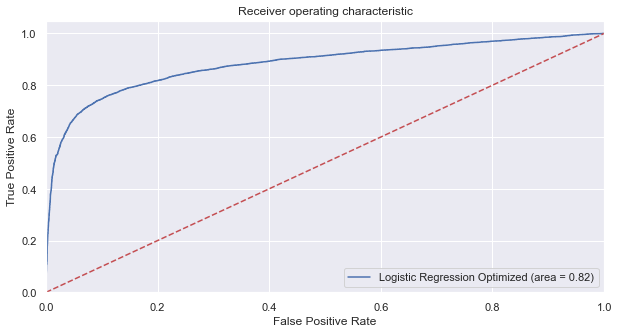

In [444]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lro.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dto.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rfo.predict(X_test))
GBM_roc_auc=roc_auc_score(y_test, gbmo.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, lro.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])
# fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression Optimized (area = %0.2f)' % logit_roc_auc)
# plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc,color="green")
# plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
# plt.plot(fpr, tpr, label='Gradient Boosting Machine(area = %0.2f)' % RF_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROCOptimized')
plt.show()

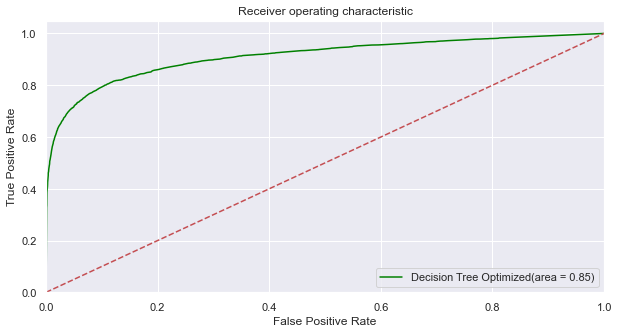

In [445]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, dto.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Decision Tree Optimized(area = %0.2f)' % tree_roc_auc,color="green")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROCOptimized')
plt.show()

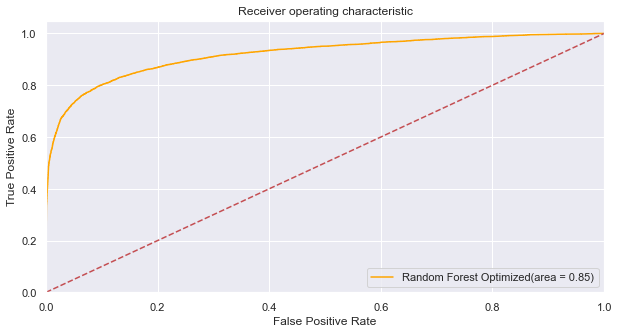

In [446]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, rfo.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Random Forest Optimized(area = %0.2f)' % tree_roc_auc,color="orange")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROCOptimized')
plt.show()

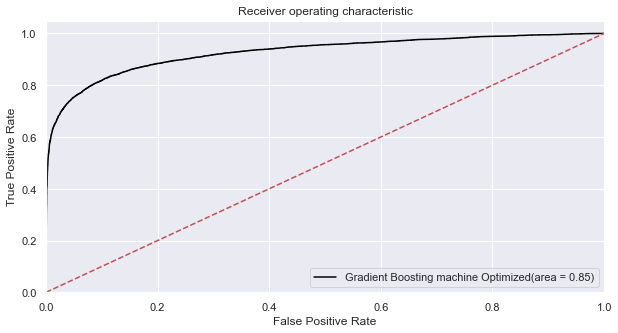

In [447]:
plt.figure()

fpr, tpr, thresholds = roc_curve(y_test, gbmo.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='Gradient Boosting machine Optimized(area = %0.2f)' % tree_roc_auc,color="black")

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBM_ROCOptimized')
plt.show()

In [448]:
# Feature importances
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  feature_importances=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
  print(feature_importances)
  fig.tight_layout()

                                importance
day_wait_ind                      3.753822
prev_cancel_ind                   2.301815
reserved_room_type_E              0.926854
customer_type_Transient           0.566991
reserved_room_type_G              0.524079
reserved_room_type_C              0.466655
market_segment_Groups             0.413046
reserved_room_type_H              0.299248
distribution_channel_TA/TO        0.141315
market_segment_Online TA          0.125264
market_segment_Corporate          0.037556
distribution_channel_Undefined    0.025836
reserved_room_type_D              0.025654
reserved_room_type_P              0.017939
market_segment_Undefined          0.013129
lead_time                         0.005697
reserved_room_type_L              0.004741
adr                               0.004025
market_segment_Complementary     -0.001037
customer_type_Group              -0.057718
distribution_channel_GDS         -0.080045
reserved_room_type_B             -0.177098
distributio

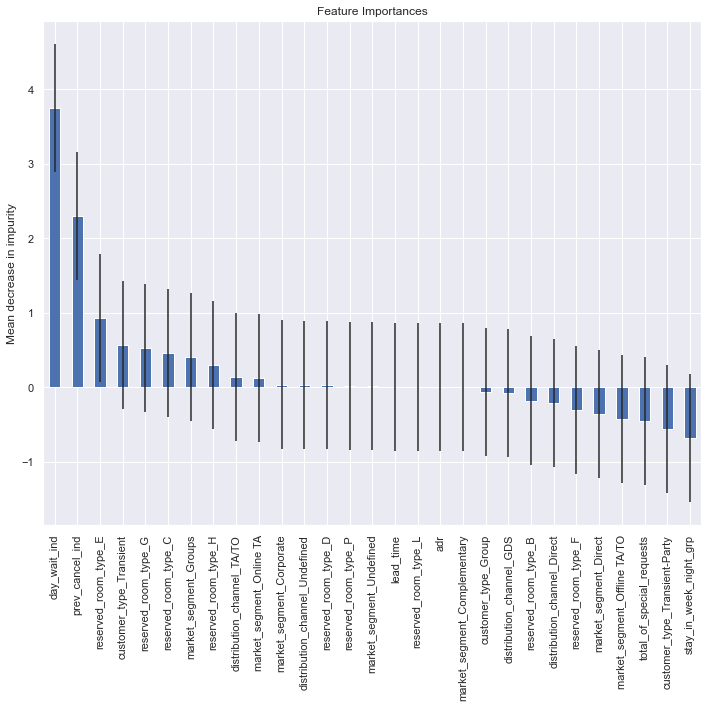

In [449]:
# Feature Importance Logistic Regression Optimized
feature_names = X_train.columns
importances = lro.coef_[0]
std = np.std(importances, axis=0)
model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
fig, axes = plt.subplots(figsize=(10,10))
model_importances.plot.bar(yerr=std, ax=axes)
axes.set_title("Feature Importances")
axes.set_ylabel("Mean decrease in impurity")
feature_importancesl=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
print(feature_importancesl)                                    
fig.tight_layout()

                                importance
day_wait_ind                      0.633049
adr                               0.098892
lead_time                         0.089316
prev_cancel_ind                   0.045764
total_of_special_requests         0.032194
customer_type_Transient           0.019178
market_segment_Offline TA/TO      0.011607
reserved_room_type_E              0.009802
customer_type_Transient-Party     0.008790
market_segment_Corporate          0.008670
reserved_room_type_F              0.006414
market_segment_Online TA          0.006133
reserved_room_type_G              0.006001
distribution_channel_TA/TO        0.005926
reserved_room_type_D              0.005163
market_segment_Groups             0.004258
distribution_channel_Direct       0.003123
reserved_room_type_C              0.002641
reserved_room_type_H              0.002592
market_segment_Direct             0.000482
market_segment_Complementary      0.000005
reserved_room_type_L              0.000000
reserved_ro

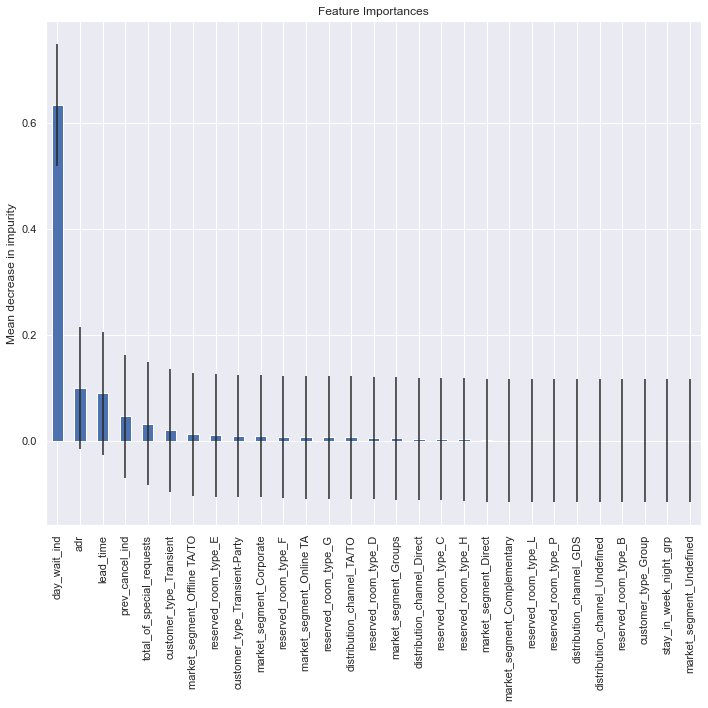

In [450]:
# Feature Importance Decision Tree Optimized

# Feature importances
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std(importances, axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  feature_importances=pd.DataFrame(importances,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
  print(feature_importances)
  fig.tight_layout()
Model_importances(dto,X_train)

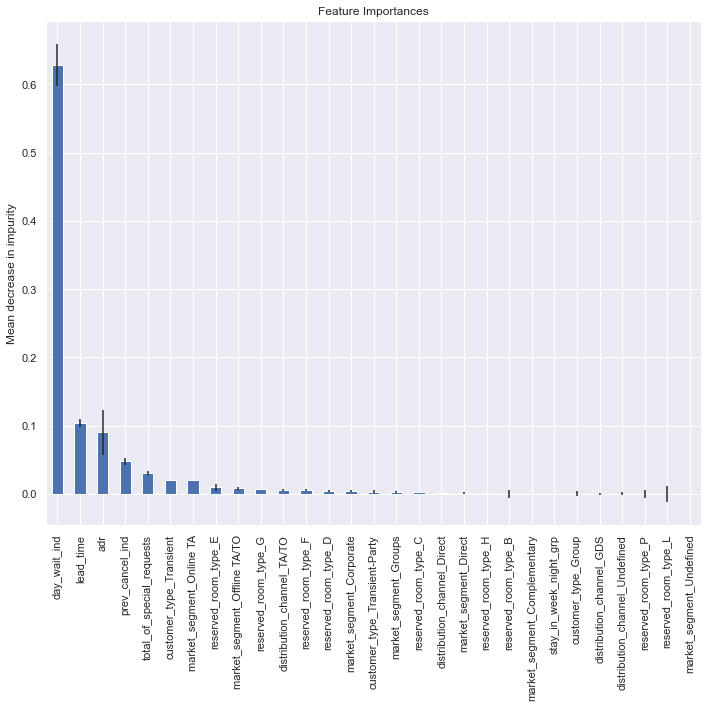

In [451]:
# Feature Importances Random Forest Optimized 
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
Model_importances(rfo,X_train)

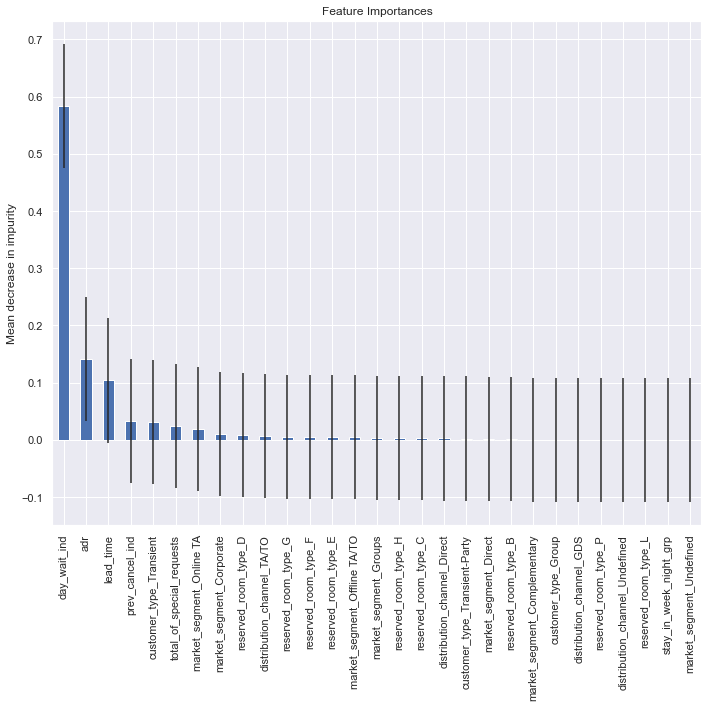

In [452]:
# Feature Importances Gradient boosting Machine Optimized 
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std(gbmo.feature_importances_, axis=0)
  model_importances = pd.Series(importances,index=feature_names).sort_values(ascending=False)
  fig, axes = plt.subplots(figsize=(10,10))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()
Model_importances(gbmo,X_train)

Predictions from the models

In [453]:
# Here we will rank all my data points in quantiles on the basis of cancellation probability.Each quantile has same no of datapoints.Thus we get an idea of the 
# cancellation chance from the ranks assigned to teh datapoints and thus we may take special actions to counter cancellation.For example special discounts,offers 
# and promotions,automatic room upgrade,local travel package discounts,food coupons etc.Overall these actions can bring down cancellation rates and thus boost revenue 
# for the hotel under consideration

In [454]:
y_pred_prob = lro.predict_proba(X_var)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank')['y_pred_P'].min()

P_Rank
0          NaN
1     0.009203
2     0.107759
3     0.146700
4     0.181252
5     0.217245
6     0.260760
7     0.324898
8     0.426769
9     0.702677
10    0.942795
Name: y_pred_P, dtype: float64

In [455]:
y_pred_prob_dtree = dto.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree']=pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree']=pd.qcut(df['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_dtree')['y_pred_P_dtree'].min()

P_Rank_dtree
0          NaN
1     0.000000
2     0.000000
3     0.051382
4     0.109129
5     0.161795
6     0.227740
7     0.327036
8     0.497180
9     0.731899
10    0.974674
Name: y_pred_P_dtree, dtype: float64

In [456]:
y_pred_prob_rf = rfo.predict_proba(X_var)[:, 1]
df['y_pred_P_rf']=pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf']=pd.qcut(df['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_rf')['y_pred_P_rf'].min()

P_Rank_rf
0          NaN
1     0.003888
2     0.063040
3     0.097562
4     0.131074
5     0.163124
6     0.226723
7     0.315142
8     0.459203
9     0.711701
10    0.962762
Name: y_pred_P_rf, dtype: float64

In [457]:
y_pred_prob_gbm = gbmo.predict_proba(X_var)[:, 1]
df['y_pred_P_gbm']=pd.DataFrame(y_pred_prob_gbm)
df['P_Rank_gbm']=pd.qcut(df['y_pred_P_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
df.groupby('P_Rank_gbm')['y_pred_P_gbm'].min()

P_Rank_gbm
0          NaN
1     0.001014
2     0.015589
3     0.025147
4     0.036813
5     0.053248
6     0.080160
7     0.134187
8     0.253533
9     0.541588
10    0.961340
Name: y_pred_P_gbm, dtype: float64

In [458]:
df.head()
df.to_csv('hotel_demand_prediction_scored_file.csv')

In [ ]:
# Through the above data analysis hotel companys may acually form startegy and planning for lowering cancellation rates which in the long run will boost revenue and thus benefit the business.